***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

In [334]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [335]:
import pandas as pd
import numpy as np
import seaborn as sns

In [336]:
import matplotlib.pyplot as plt
import matplotlib as mlp

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [337]:
df = pd.read_csv('/content/drive/MyDrive/DADOS/dados/dados_pnad.csv', sep= ',')

### Visualize o conteúdo do DataFrame

In [338]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [339]:
print(df['Renda'].min())
print(df['Renda'].max())

0
200000


In [340]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

grupos = ['0 a 2 SM',
          '2 a 5 SM',
          '5 a 15 SM',
          '15 a 25 SM',
          'Mais de 25 SM']

### 2º Definir os labels das classes

In [341]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [342]:
frequencia = pd.value_counts(
    pd.cut(x= df['Renda'],
           bins= classes,
           labels= labels,
           include_lowest= True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [343]:
percentual = pd.value_counts(
    pd.cut(x= df['Renda'],
           bins= classes,
           labels= labels,
           include_lowest= True),
    normalize= True).round(3) * 100
percentual

E    64.8
D    24.2
C     9.4
B     1.1
A     0.5
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [344]:
dist_freq = pd.DataFrame({'Grupo' : grupos,
                          'Frequencia' : frequencia,
                          'Percentual (%)' : percentual})
dist_freq.rename_axis('Classes', axis='columns', inplace=True)

dist_freq.sort_index(ascending= False)

Classes,Grupo,Frequencia,Percentual (%)
A,Mais de 25 SM,420,0.5
B,15 a 25 SM,822,1.1
C,5 a 15 SM,7241,9.4
D,2 a 5 SM,18602,24.2
E,0 a 2 SM,49755,64.8


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

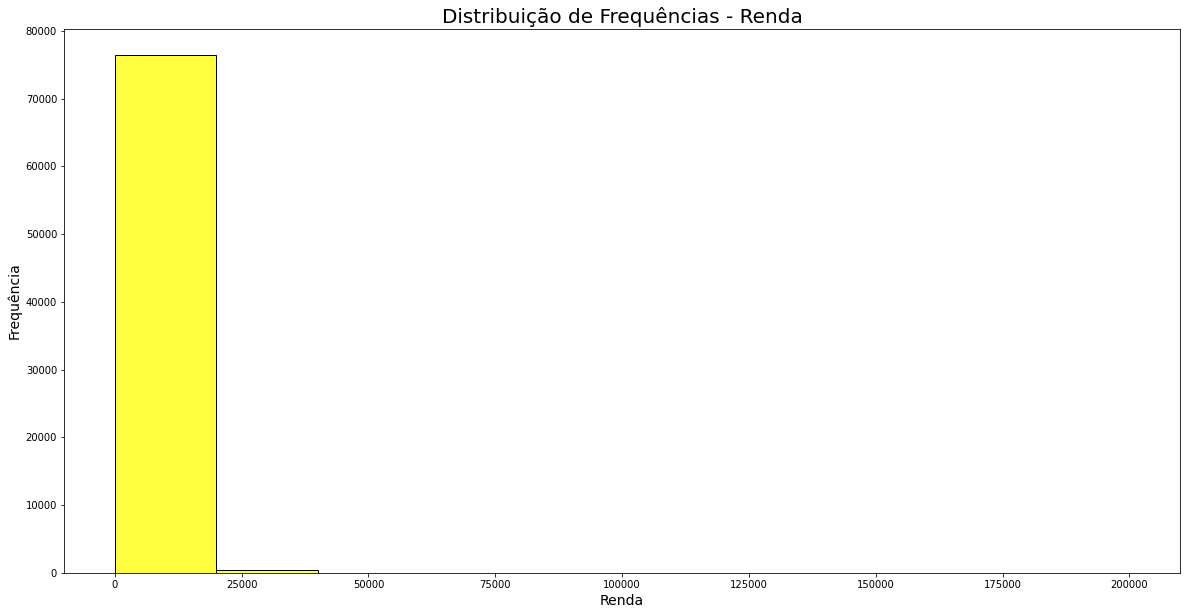

In [345]:
ax = sns.histplot(df['Renda'],
                  kde=False,
                  color= 'yellow',
                  bins= 10)

ax.figure.set_size_inches(20, 10)
ax.set_title('Distribuição de Frequências - Renda',
             fontsize= 20)
ax.set_xlabel('Renda',
              fontsize= 14)
ax.set_ylabel('Frequência',
              fontsize= 14)

ax

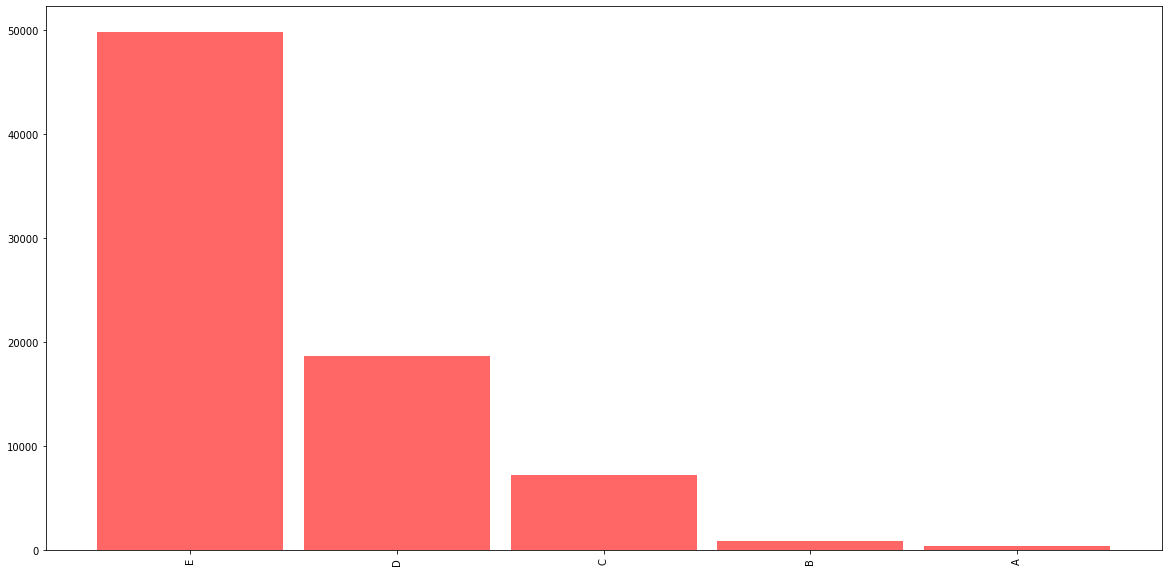

In [346]:
dist_freq['Frequencia'].plot.bar(width= 0.9,
                                 color= 'red',
                                 alpha= 0.6,
                                 figsize=(20, 10))

> ### Conclusões

O HISTOGRAMA ACIMA MOSTRA ALGUNS VALORES ATÍPICOS QUE OCASIONAM UMA ANALISE MENOS PRECISA DO CONJUNTO DE DADOS.
É NOTÁVEL QUE EXISTE UMA DISTORÇÃO MUITO GRANDE QUE PUXA O HISTOGRAMA PARA O LADO DIREITO.
A SOLUÇÃO SERIA UM TRATAMENTO DOS DADOS PARA UMA MELHOR ANÁLISE.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [347]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


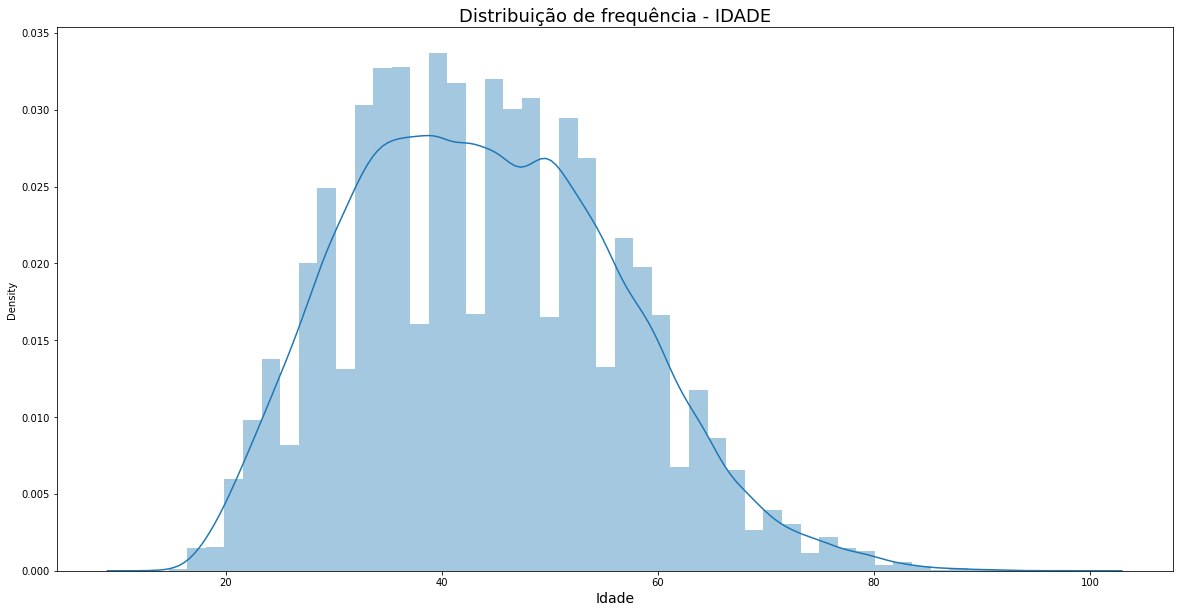

In [348]:
# IDADE
ax1 = sns.distplot(df['Idade'])
ax1.figure.set_size_inches(20, 10)
ax1.set_title('Distribuição de frequência - IDADE',
             fontsize= 18)
ax1.set_xlabel('Idade',
              fontsize= 14)

ax1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


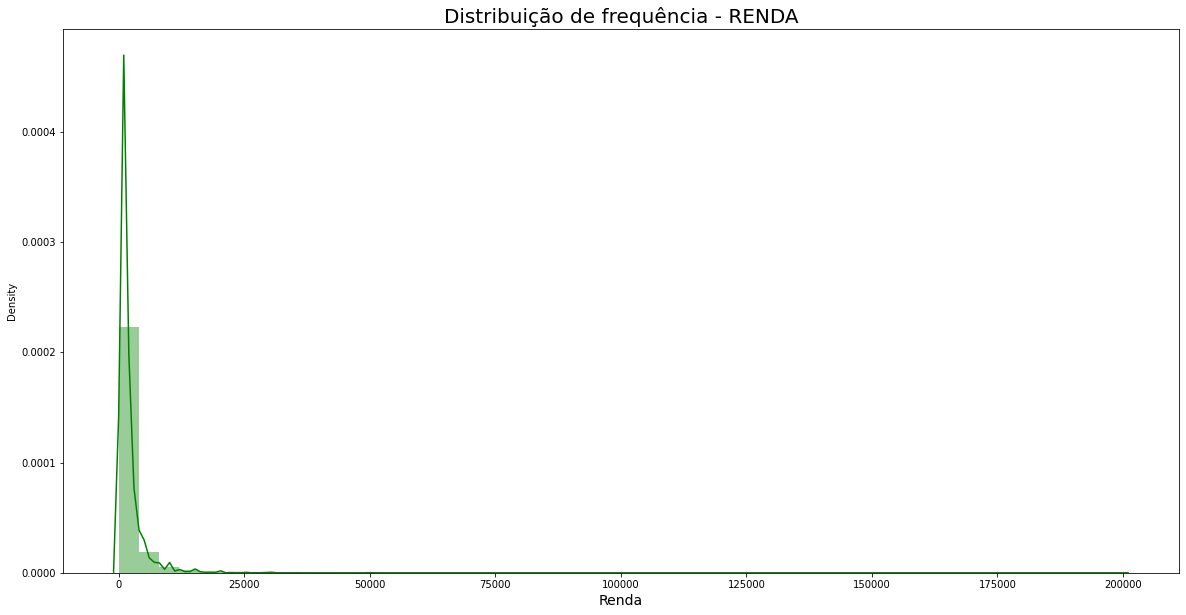

In [349]:
# RENDA
ax2 = sns.distplot(df['Renda'],
                  color= 'g')
ax2.figure.set_size_inches(20, 10)
ax2.set_title('Distribuição de frequência - RENDA',
             fontsize= 20)
ax2.set_xlabel('Renda',
              fontsize= 14)

ax2

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


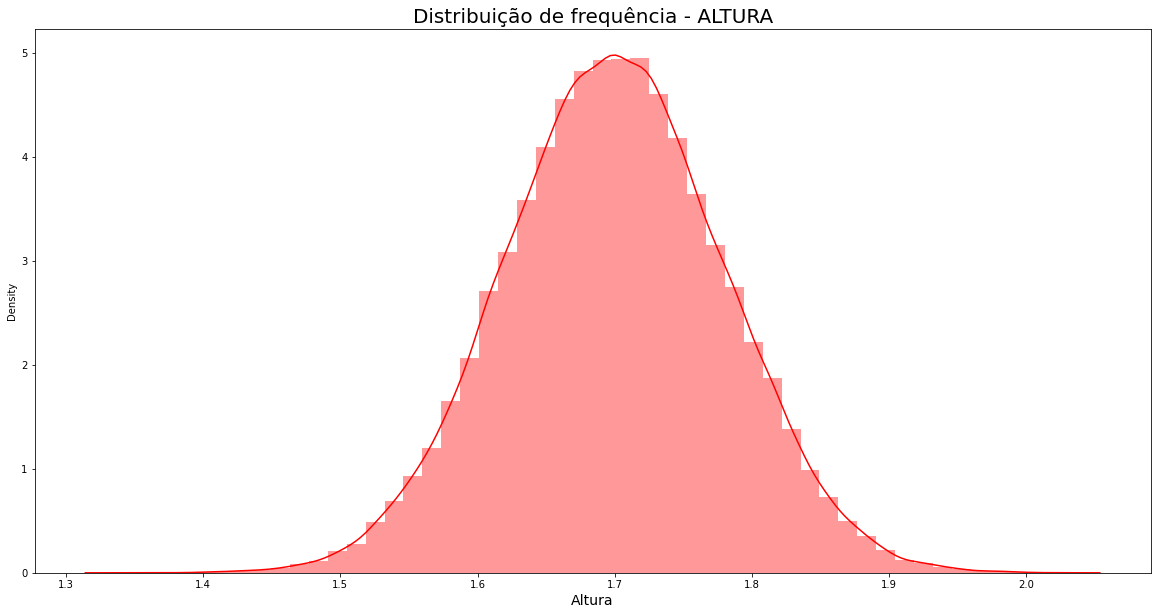

In [350]:
# ALTURA
ax3 = sns.distplot(df['Altura'],
                  color= 'r')
ax3.figure.set_size_inches(20, 10)
ax3.set_title('Distribuição de frequência - ALTURA',
             fontsize= 20)
ax3.set_xlabel('Altura',
              fontsize= 14)

ax3

In [351]:
df2 = df[df['Renda'] <= 20000]
df2['Renda'].max()

20000

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


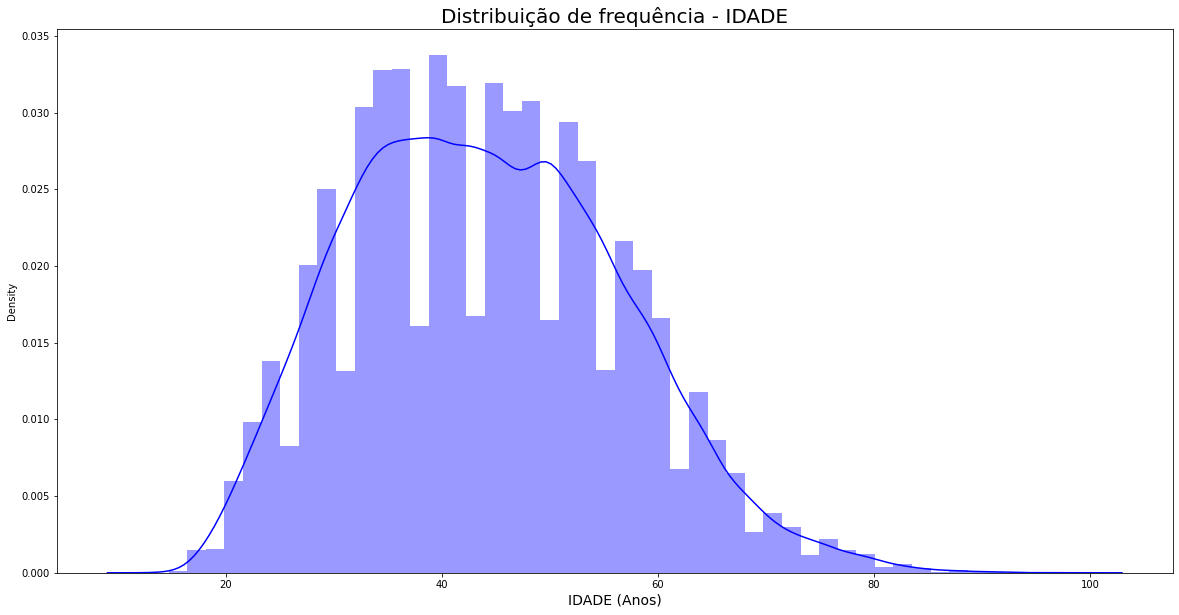

In [352]:
# IDADE
ax4 = sns.distplot(df2['Idade'],
                  color= 'b')
ax4.figure.set_size_inches(20, 10)
ax4.set_title('Distribuição de frequência - IDADE',
             fontsize= 20)
ax4.set_xlabel('IDADE (Anos)',
              fontsize= 14)

ax4

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


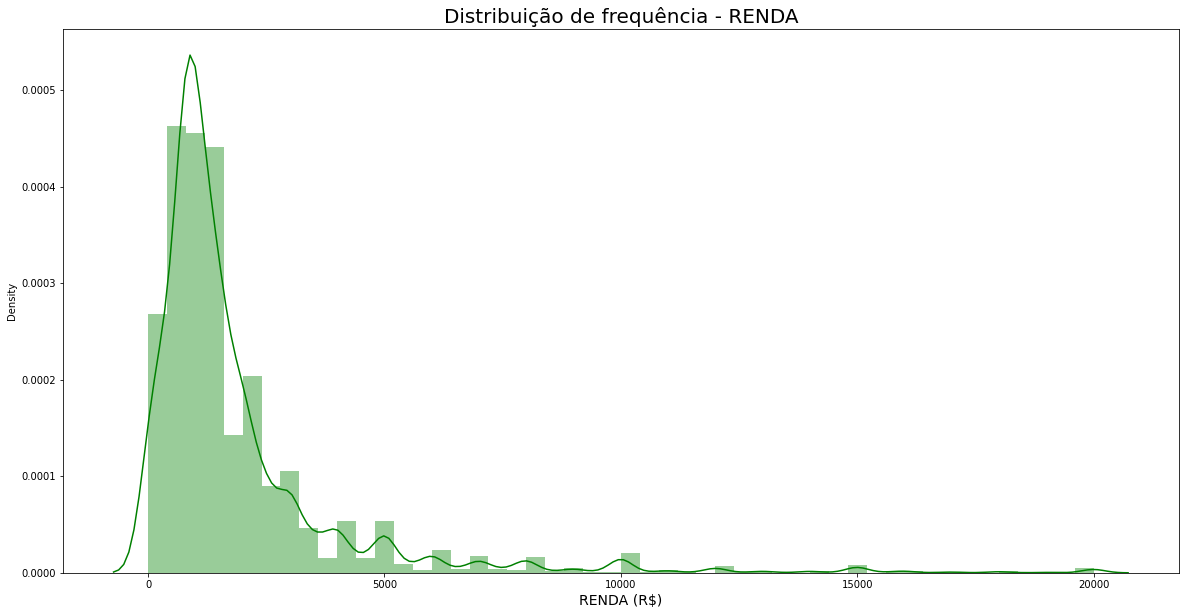

In [353]:
# RENDA
ax5 = sns.distplot(df2['Renda'],
                  color= 'g')
ax5.figure.set_size_inches(20, 10)
ax5.set_title('Distribuição de frequência - RENDA',
             fontsize= 20)
ax5.set_xlabel('RENDA (R$)',
              fontsize= 14)

ax5

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


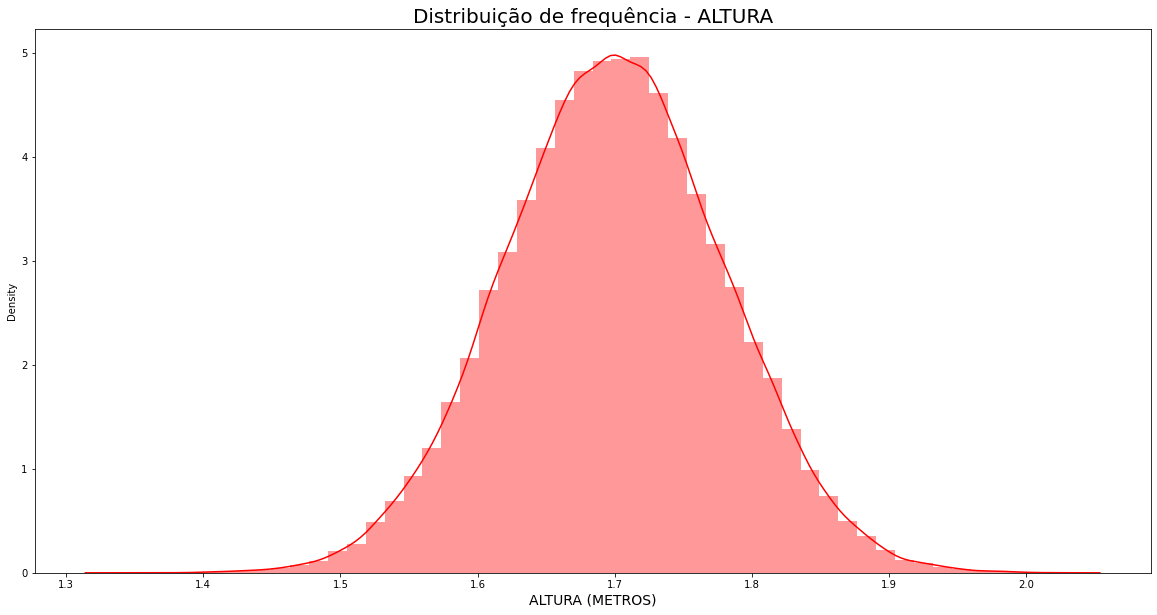

In [354]:
# ALTURA
ax6 = sns.distplot(df2['Altura'],
                  color= 'r')
ax6.figure.set_size_inches(20, 10)
ax6.set_title('Distribuição de frequência - ALTURA',
             fontsize= 20)
ax6.set_xlabel('ALTURA (METROS)',
              fontsize= 14)

ax6

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [355]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [356]:
selecao = pd.crosstab(df['Sexo'],
                      df['Cor'])
selecao.rename(index= sexo,
               columns= cor,
               inplace= True)
selecao

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [357]:
selecao = pd.crosstab(df['Sexo'],
                      df['Cor'],
                      normalize= True) * 100
selecao.rename(index= sexo,
               columns= cor,
               inplace= True)
selecao

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

> EM RELAÇÃO A DISTRIBUIÇÃO DE FREQUENCIA E PERCENTUAL POR "SEXO":

O NUMERO DE REGISTROS MASCULINOS É DE, APROXIMADAMENTE, 53 MIL REGISTROS OU 69% DO DATASET TOTAL.
O NÚMERO DE REGISTROS FEMININOS É DE, APROXIMADAMENTE, 25 MIL E 500 REGISTROS OU
31% DO DATASET TOTAL.

> EM RELAÇÃO A DISTRIBUIÇÃO DE FREQUENCIA E PERCENTUAL POR "COR":

AS CLASSES PARDA E BRANCA REPRESENTAM CERCA DE 88% DE TODO O DATASET ANALISADO, EQUIVALENDO A 67 MIL REGISTROS COMPOSTOS PELOS MESMOS.
AS CLASSES PRETA, INDIGENA E AMARELA SEGUEM ATRÁS COM 12% DE TODO O DATASET, O EQUIVALENTE A 9 MIL REGISTROS.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [358]:
# média total da renda
print(f"R$ {df['Renda'].mean().round(3)}")

R$ 2000.383


In [359]:
# média por sexo
selecao = df.groupby(['Sexo'])['Renda'].mean().round(3)
selecao.rename(index= sexo, inplace= True)

selecao

Sexo
Masculino    2192.442
Feminino     1566.847
Name: Renda, dtype: float64

### Obtenha a mediana

In [360]:
# mediana total da renda
print(f"R$ {df['Renda'].median().round(3)}")

R$ 1200.0


In [361]:
# mediana por sexo
selecao = df.groupby(['Sexo'])['Renda'].median().round(3)
selecao.rename(index= sexo, inplace= True)

selecao

Sexo
Masculino    1350.0
Feminino      900.0
Name: Renda, dtype: float64

In [362]:
df2['Renda'].quantile()

1200.0

### Obtenha a moda

In [363]:
# moda total da renda
df['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [364]:
desvio_medio_absoluto = df['Renda'].mad()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [365]:
variancia = df['Renda'].var()
variancia

11044906.006217021

### Obtenha o desvio-padrão

In [366]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [367]:
renda_media = pd.crosstab(df['Sexo'],
                          df['Cor'],
                          aggfunc= 'mean',
                          values= df['Renda']).round(2)
renda_media.rename(index= sexo,
                   columns= cor,
                   inplace= True)
renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


In [368]:
renda_mediana = pd.crosstab(df['Sexo'],
                            df['Cor'],
                            aggfunc= 'median',
                            values= df['Renda']).round(2)
renda_mediana.rename(index= sexo,
                     columns= cor,
                     inplace= True)
renda_mediana

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [369]:
renda_maxima = pd.crosstab(df['Sexo'],
                           df['Cor'],
                           aggfunc= 'max',
                           values= df['Renda']).round(2)
renda_maxima.rename(index= sexo,
                    columns= cor,
                    inplace= True)
renda_maxima

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Com relação as medias e medianas, as relações entre cor e sexo mostram que grupos femininos recebem menos que o masculino.

Ainda na relçao de média, grupos masculinos de cor branca e amarela tem um salario maior dos demais.

Por ultimo, se tratando da renda maxima, percebe-se que boa parte dos grupos recebem uma maxima igualmente; com excessão de algumas categorias como indígenas tanto feminino quanto masculino.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [370]:
renda_media_abs = pd.crosstab(index= df['Cor'],
                              columns= df['Sexo'],
                              aggfunc= {'mad', 'var', 'std'},
                              values= df['Renda']).round(2)
renda_media_abs.rename(index= cor,
                       columns= sexo,
                       inplace= True)
renda_media_abs

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Os desvios medios absolutos são maiores para o grupo masculino do que para o grupo feminino.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [371]:
df3 = df[df['Renda'] <= 10000]
df3['Renda'].max()

10000

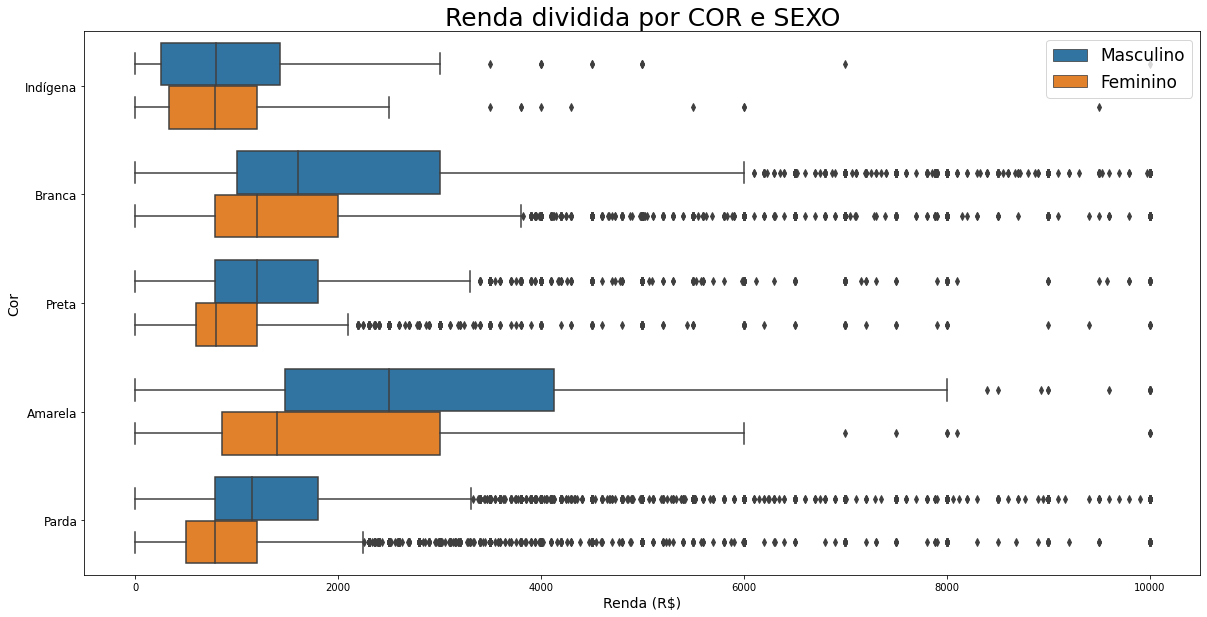

In [372]:
ax = sns.boxplot(data= df3, #você pode substituir por um comando (df.query('Renda' <= 10000))
                 x= 'Renda',
                 y= 'Cor',
                 hue= 'Sexo',
                 orient= 'h')
ax.figure.set_size_inches(20, 10)

ax.set_title('Renda dividida por COR e SEXO', fontsize= 25)

ax.set_xlabel('Renda (R$)', fontsize= 14)

ax.set_ylabel('Cor', fontsize= 14)
ax.set_yticklabels([value for value in cor.values()],
                   fontsize= 12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'],
          loc= 'upper right',
          fontsize= 17)

ax

> ### Para o grupo masculino. Suas médias e máximas também são maiores comparadas ao grupo feminino.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [373]:
from scipy import stats

percentual = stats.percentileofscore(df['Renda'], 788, kind= 'weak')
print(f"{percentual}%")

28.86777719937533%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [374]:
df_max = df.quantile(.99).max()
print(f"R$ {df_max}")

R$ 15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [375]:
# RENDA MÉDIA SEGUNDO ANOS DE ESTUDO E SEXO
renda_media = pd.crosstab(df['Anos de Estudo'],
                          df['Sexo'],
                          aggfunc= 'mean',
                          values= df['Renda']).round(2)
renda_media.rename(index= anos_de_estudo,
                   columns= sexo,
                   inplace= True)
renda_media

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,799.49,516.20
1 ano,895.63,492.77
2 anos,931.18,529.91
3 anos,1109.20,546.85
4 anos,1302.33,704.28
5 anos,1338.65,781.39
6 anos,1448.88,833.73
7 anos,1465.50,830.75
8 anos,1639.40,933.62


### Conclusões

Existe uma relação direta com a variavel "Anos de Estudo" onde mostra que pessoas tanto do sexo feminino quanto o masculino obtem uma renda maior se os anos de estudo também forem maiores.

In [376]:
# RENDA MEDIANA SENGUNDO ANOS DE ESTUDO E SEXO
renda_mediana = pd.crosstab(index= df['Anos de Estudo'],
                            columns= df['Sexo'],
                            aggfunc= 'median',
                            values= df['Renda']).round(2)
renda_mediana.rename(index= anos_de_estudo,
                     columns= sexo,
                     inplace= True)
renda_mediana

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800


In [377]:
# RENDA MAXIMA SEGUNDO ANOS DE ESTUDO E SEXO
renda_max = pd.crosstab(index= df['Anos de Estudo'],
                        columns= df['Sexo'],
                        aggfunc= 'max',
                        values= df['Renda']).round(2)
renda_max.rename(index= anos_de_estudo,
                 columns= sexo,
                 inplace= True)
renda_max

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000


In [378]:
# DESVIO PADRÃO SEGUNDO ANOS DE ESTUDO E SEXO
desvio_padrao = pd.crosstab(df['Anos de Estudo'],
                          df['Sexo'],
                          aggfunc= 'std',
                          values= df['Renda']).round(2)
desvio_padrao.rename(index= anos_de_estudo,
                   columns= sexo,
                   inplace= True)
desvio_padrao

Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,1023.90,639.31
1 ano,1331.95,425.29
2 anos,1435.17,498.23
3 anos,2143.80,424.12
4 anos,1419.82,629.55
5 anos,1484.65,635.78
6 anos,1476.63,574.55
7 anos,1419.71,602.04
8 anos,1515.58,896.78


### Conclusões

A renda maxima para o grupo masculino é de 200 mil enquanto o feminino chega ao maximo de 120 mil.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [379]:
renda_max_dezMil = df[df['Renda'] <= 10000]
renda_max_dezMil['Renda'].max()

10000

In [380]:
selecao = renda_max_dezMil.query('Renda <= 10000 and Idade == 75')
selecao.groupby(['Sexo'])['Renda'].max()

Sexo
0    10000
1     5630
Name: Renda, dtype: int64

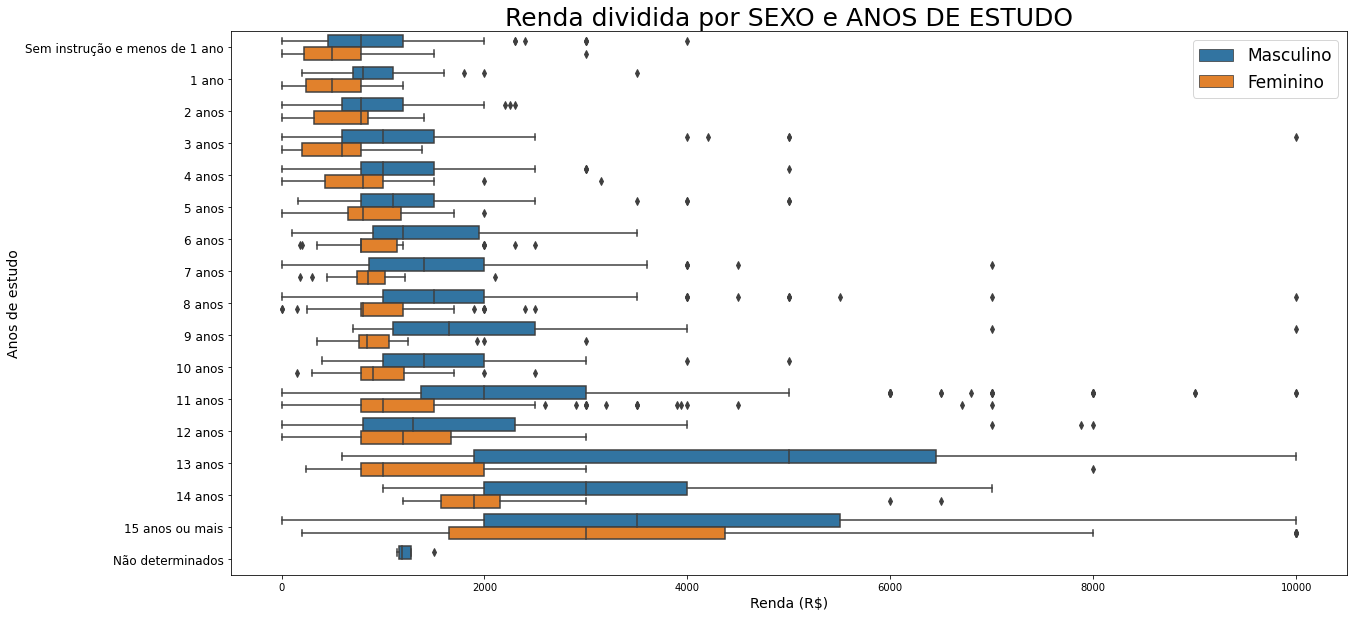

In [388]:
ax = sns.boxplot(data= df.query('Renda <= 10000 and Idade == 50'),
                 x= 'Renda',
                 y= 'Anos de Estudo',
                 hue= 'Sexo',
                 orient= 'h')
ax.figure.set_size_inches(20, 10)

ax.set_title('Renda dividida por SEXO e ANOS DE ESTUDO', fontsize= 25)

ax.set_xlabel('Renda (R$)', fontsize= 14)

ax.set_ylabel('Anos de estudo', fontsize= 14)
ax.set_yticklabels([value for value in anos_de_estudo.values()],
                   fontsize= 12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'],
          loc= 'upper right',
          fontsize= 17)

ax

> ### Conclusões

O boxplot mostra que mesmo com uma renda igual ou abaixo de 10 mil, ainda exite uma dicrepancia de renda entre os grupos masculino e feminino.

Nota-se que a renda máxima e a variancia de renda é maior para o grupo masculino, chegando à 10 mil reais contra, aproximadamente, 7 mil e 800 reias pro grupo feminino.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [390]:
# RENDA MÉDIA SEGUNDO UNIDADES DA FEDERAÇÃO
renda_media = df.groupby(['UF']).agg({'Renda' : 'mean'})
renda_media.rename(index= uf,
                   inplace= True)

renda_media['Renda'].sort_values()

UF
Maranhão               1019.432009
Piauí                  1074.550784
Sergipe                1109.111111
Alagoas                1144.552602
Ceará                  1255.403692
Paraíba                1293.370487
Rio Grande do Norte    1344.721480
Pará                   1399.076871
Bahia                  1429.645094
Amazonas               1445.130100
Acre                   1506.091782
Pernambuco             1527.079319
Tocantins              1771.094946
Roraima                1783.588889
Rondônia               1789.761223
Amapá                  1861.353516
Goiás                  1994.580794
Espírito Santo         2026.383852
Minas Gerais           2056.432084
Mato Grosso            2130.652778
Mato Grosso do Sul     2262.604167
Rio Grande do Sul      2315.158336
Santa Catarina         2470.854945
Paraná                 2493.870753
Rio de Janeiro         2496.403168
São Paulo              2638.104986
Distrito Federal       4241.954722
Name: Renda, dtype: float64

In [391]:
# RENDA MEDIANA SEGUNDO UNIDADES DA FEDERAÇÃO
renda_mediana = df.groupby('UF').agg({'Renda' : 'median'})
renda_mediana.rename(index= uf,
                     inplace= True)

renda_mediana['Renda'].sort_values()

UF
Maranhão                700.0
Piauí                   750.0
Alagoas                 788.0
Paraíba                 788.0
Sergipe                 788.0
Ceará                   789.0
Rio Grande do Norte     800.0
Bahia                   800.0
Pará                    850.0
Acre                    900.0
Amazonas                900.0
Pernambuco              900.0
Roraima                1000.0
Tocantins              1000.0
Minas Gerais           1200.0
Rondônia               1200.0
Amapá                  1200.0
Espírito Santo         1274.0
Rio de Janeiro         1400.0
Paraná                 1500.0
Rio Grande do Sul      1500.0
Mato Grosso do Sul     1500.0
Mato Grosso            1500.0
Goiás                  1500.0
São Paulo              1600.0
Santa Catarina         1800.0
Distrito Federal       2000.0
Name: Renda, dtype: float64

In [392]:
# RENDA MÁXIMA SEGUNDO UNIDADES DA FEDERAÇÃO
renda_maxima = df.groupby('UF').agg({'Renda' : 'max'})
renda_maxima.rename(index= uf,
                    inplace= True)

renda_maxima['Renda'].sort_values()

UF
Alagoas                 11000
Rio Grande do Norte     15500
Amapá                   15580
Sergipe                 16000
Roraima                 20000
Amazonas                22000
Ceará                   25000
Acre                    30000
Maranhão                30000
Paraíba                 30000
Goiás                   30000
Mato Grosso             35000
Rio Grande do Sul       35000
Piauí                   40000
Mato Grosso do Sul      42000
Rondônia                50000
Pernambuco              50000
Pará                    50000
Tocantins               60000
São Paulo               80000
Santa Catarina          80000
Minas Gerais           100000
Espírito Santo         100000
Distrito Federal       100000
Rio de Janeiro         200000
Paraná                 200000
Bahia                  200000
Name: Renda, dtype: int64

In [393]:
# DESVIO PADRÃO SEGUNDO UNIDADES DE FEDERAÇÃO
std_renda = df.groupby('UF').agg({'Renda' : 'std'})
std_renda.rename(index= uf,
                 inplace= True)

std_renda['Renda'].sort_values()

UF
Alagoas                1237.856197
Sergipe                1478.997878
Rio Grande do Norte    1651.805500
Amazonas               1757.935591
Ceará                  1821.963536
Maranhão               1887.816905
Paraíba                1950.272431
Amapá                  2020.688632
Pará                   2053.779555
Roraima                2079.659238
Goiás                  2221.933065
Acre                   2276.233415
Piauí                  2373.355726
Pernambuco             2389.622497
Rondônia               2406.161161
Mato Grosso            2542.630178
Rio Grande do Sul      2913.335783
Tocantins              2934.590741
Mato Grosso do Sul     3031.419122
Santa Catarina         3137.651112
São Paulo              3503.777366
Bahia                  3507.917248
Espírito Santo         3513.846868
Minas Gerais           3584.721547
Paraná                 4302.937995
Rio de Janeiro         5214.583518
Distrito Federal       5550.463338
Name: Renda, dtype: float64

In [398]:
rendas_estatisticas_por_uf = df.groupby(['UF']).agg({'Renda' : ['mean', 'median', 'max', 'std']})
rendas_estatisticas_por_uf.rename(index= uf, inplace= True)
rendas_estatisticas_por_uf['Renda'].sort_index()

,mean,median,max,std
UF,,,,
Acre,1506.091782,900.0,30000,2276.233415
Alagoas,1144.552602,788.0,11000,1237.856197
Amapá,1861.353516,1200.0,15580,2020.688632
Amazonas,1445.130100,900.0,22000,1757.935591
Bahia,1429.645094,800.0,200000,3507.917248
Ceará,1255.403692,789.0,25000,1821.963536
Distrito Federal,4241.954722,2000.0,100000,5550.463338
Espírito Santo,2026.383852,1274.0,100000,3513.846868
Goiás,1994.580794,1500.0,30000,2221.933065


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

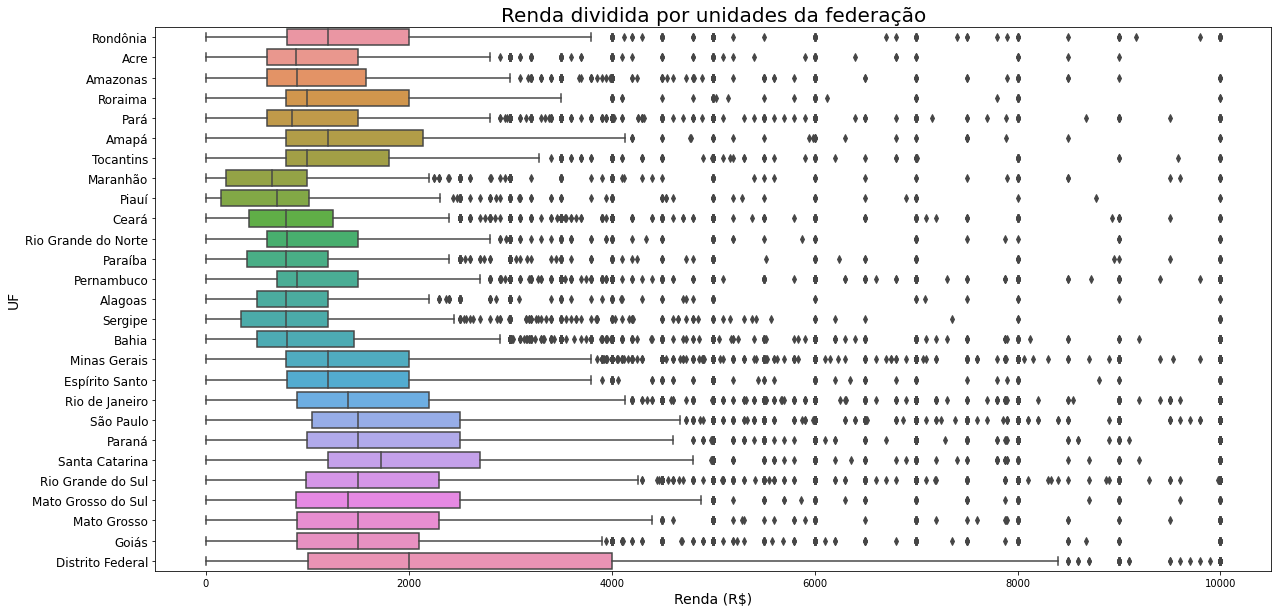

In [400]:
ax = sns.boxplot(data = df.query('Renda <= 10000'),
                 x= 'Renda',
                 y= 'UF',
                 orient= 'h')
ax.figure.set_size_inches(20, 10)
ax.set_title('Renda dividida por unidades da federação', fontsize= 20)
ax.set_xlabel('Renda (R$)', fontsize= 14)
ax.set_ylabel('UF', fontsize= 14)
ax.set_yticklabels([value for value in uf.values()],
                   fontsize= 12)

ax

> ### Conclusões

As distribuições de renda seguem dessa forma:

>> RENDA MÉDIA:

Mínima = Piauí (R$ 900,00)

Maxima = Distrito Federal (2.9000,00)

>> RENDA MEDIANA:

Mínima = Maranhão (650,00)

Maxima = Distrito Federal (2.000,00)

>> RENDA MAXIMA:

Mínima = Acre (9.000,00)

Maxima = Distrito Federal (10.000,00)

>> DESVIO PADRÃO DA RENDA

Mínima = Piauí (1.168,00)

Maxima = Distrito Federal (2.504,00)